<a href="https://colab.research.google.com/github/KamilaMurawska/Notebooks/blob/main/testipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DUST rhizobox project - Picacho Peak

Rhizobox experiment with different inoculants added to soil and diferent plant species
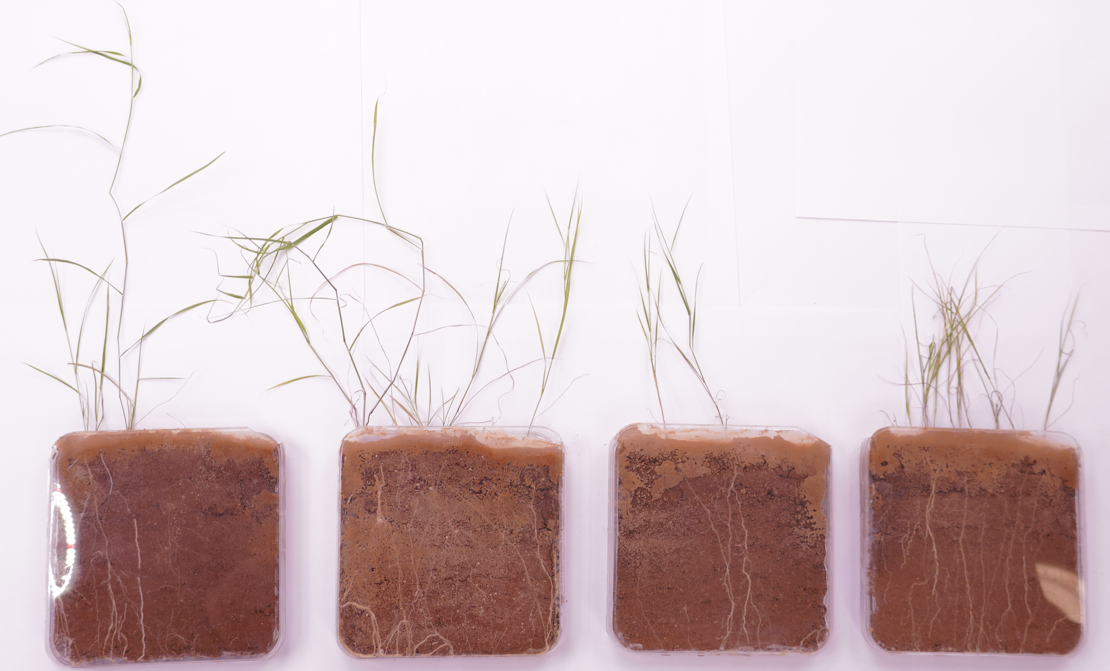

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [14]:
file_name = "https://raw.githubusercontent.com/KamilaMurawska/Test/main/Book1.csv?token=GHSAT0AAAAAABSEUORWUMNVEPWJNI4YRHGKYR2OB2A"
df = pd.read_csv(file_name)

print('Head \n', df.head())
print('Tail \n', df.tail())

Head 
   Treatment  inoculant_treatment_nb  plant_species_nb Species  replicate  \
0      none                       1                 1    none          1   
1      none                       1                 1    none          2   
2      none                       1                 1    none          3   
3      none                       1                 1    none          4   
4      none                       1                 1    none          5   

  sample  ID Scan  Root_length  Root_system_area  Leaf_area  Plant_height  \
0  1_1_1   1  NaN          NaN               NaN        NaN           NaN   
1  1_1_2   2  NaN          NaN               NaN        NaN           NaN   
2  1_1_3   3  NaN          NaN               NaN        NaN           NaN   
3  1_1_4  78  NaN          NaN               NaN        NaN           NaN   
4  1_1_5  37  NaN          NaN               NaN        NaN           NaN   

   Plant_fresh_mass Plant_dry_mass  Ind_per_rhizobox  Root_length_per_ind

Dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Treatment                 90 non-null     object 
 1   inoculant_treatment_nb    90 non-null     int64  
 2   plant_species_nb          90 non-null     int64  
 3   Species                   90 non-null     object 
 4   replicate                 90 non-null     int64  
 5   sample                    90 non-null     object 
 6   ID                        90 non-null     int64  
 7   Scan                      64 non-null     object 
 8   Root_length               61 non-null     float64
 9   Root_system_area          61 non-null     float64
 10  Leaf_area                 60 non-null     float64
 11  Plant_height              60 non-null     float64
 12  Plant_fresh_mass          54 non-null     float64
 13  Plant_dry_mass            54 non-null     object 
 14  Ind_per_rhiz

statistical analysis of the numeric variables of the dataframe, but with subset (metadata removed)

In [51]:
df.iloc[:,7:17].describe()


,Root_length,Root_system_area,Leaf_area,Plant_height,Plant_fresh_mass,Ind_per_rhizobox,Root_length_per_ind,Root_system_area_per_ind
count,61.000000,61.000000,60.000000,60.000000,54.000000,61.000000,60.000000,60.000000
mean,304.928197,99.093871,10.763167,12.541667,0.266720,5.278689,96.740645,32.091806
std,280.586262,27.283040,7.972293,9.070726,0.191939,3.958666,135.150495,27.404501
min,10.057000,5.491813,0.170000,1.600000,0.010000,1.000000,9.676167,6.550177
25%,139.774000,91.310040,4.620000,6.000000,0.096225,2.000000,29.111700,13.300244
50%,229.800000,105.739012,9.570000,8.400000,0.227250,4.000000,52.609950,22.537360
75%,366.027000,119.918055,14.257500,18.250000,0.360750,8.000000,99.109923,40.179007
max,1340.413000,127.275783,33.250000,36.000000,0.756900,18.000000,735.147000,113.660227


# Boxplots

Looking at differences between plant species

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


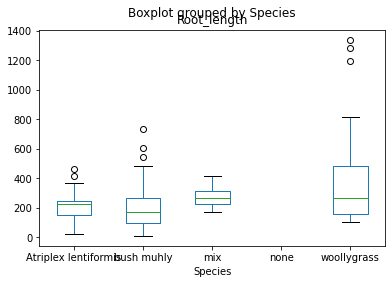

In [60]:
df.boxplot(by ='Species', column =['Root_length'], grid = False)

Effect of inoculants

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


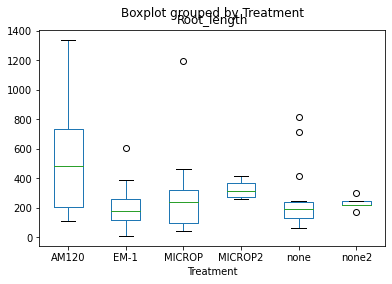

In [61]:
df.boxplot(by ='Treatment', column =['Root_length'], grid = False)

Seaborn library

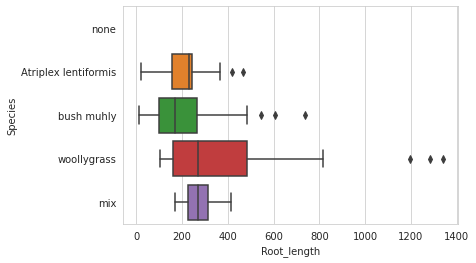

In [64]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Root_length', y = 'Species', data = df)

Distribution plot

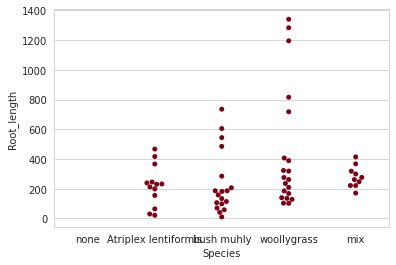

In [66]:
ax = sns.swarmplot(x="Treatment", y="Root_length", data=df, color='#7d0013')
plt.show()

# Basic statistics: ANOVA

In [67]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Root_length ~ C(Species)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(Species),7.140653e+05,4.0,2.429565,0.074555
Residual,4.188170e+06,57.0,NaN,NaN
